# Задача кредитного скоринга

_Целевая переменная_ (таргет) – `SeriousDlqin2yrs`: клиент имел просрочку 90 и более дней

### Признаки
- `RevolvingUtilizationOfUnsecuredLines`: общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt
like car loans divided by the sum of credit limits)
- `age`: возраст заемщика
- `NumberOfTime30-59DaysPastDueNotWorse`: сколько раз за последние 2 года наблюдалась просрочка 30-59 дней
- `DebtRatio`: ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт
- `NumberOfTimes90DaysLate`: сколько раз наблюдалась просрочка (90 и более дней)
- `NumberRealEstateLoansOrLines`: количество кредиов (в том числе под залог жилья)
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др)
- `GroupAge`: закодированная возрастная группа - чем больше код, тем больше возраст

## Загрузка + очистка датасета

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("credit_scoring.csv")

In [3]:
data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d


In [4]:
data.shape

(150000, 12)

In [5]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                     14845
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

In [6]:
data.age=data.age.fillna(0)
data.MonthlyIncome=data.MonthlyIncome.fillna(data.MonthlyIncome.median())
data.NumberOfDependents=data.NumberOfDependents.fillna(1)

In [7]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
RealEstateLoansOrLines                   object
GroupAge                                 object
dtype: object

In [8]:
translate = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
data.RealEstateLoansOrLines =data.RealEstateLoansOrLines.apply(lambda x: x.lower())
data.RealEstateLoansOrLines = np.where(np.isin(data.RealEstateLoansOrLines, list(translate.keys())),
                              [translate[feature.lower()] for feature in data.RealEstateLoansOrLines], data.RealEstateLoansOrLines)
data.GroupAge = np.where(np.isin(data.GroupAge, list(translate.keys())),
                              [translate[feature.lower()] for feature in data.GroupAge], data.GroupAge)

In [9]:
data.RealEstateLoansOrLines = data.RealEstateLoansOrLines.astype('int')
data.GroupAge = data.GroupAge.astype('int')

In [10]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,47.118293,0.421033,353.005076,6.418455e+03,8.452760,0.265973,0.240387,0.763573,1.076920,3.771887
std,0.249746,249.755371,20.987749,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,4.155179,1.101086,0.306057,0.989830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.029867,37.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,0.000000,0.154181,50.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,0.000000,0.559046,61.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,0.000000,1.000000,1.000000,5.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000,5.000000,5.000000


In [11]:
for col in data.columns:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

SeriousDlqin2yrs DISTRIBUTION
0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

RevolvingUtilizationOfUnsecuredLines DISTRIBUTION
0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.713147        6
            ...  
1.024961        1
0.006480        1
0.055599        1
0.887419        1
1.026395        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 125728, dtype: int64

age DISTRIBUTION
0.0      14846
49.0      3471
48.0      3456
63.0      3374
50.0      3365
         ...  
102.0        3
101.0        2
109.0        2
107.0        1
105.0        1
Name: age, Length: 86, dtype: int64

NumberOfTime30-59DaysPastDueNotWorse DISTRIBUTION
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

DebtRatio DISTRIBUTION
0.000000    4113
1.000000   

`Наблюдается сильный дисбаланс обьясняемой переменной -> нужно это учесть при построении модели` (выборе метрики)

### По распредлению видно, что имеются выбросы (неверные данные)
Построим ящик с усами для "подозреваемых", посмотрим на выбросы и удалим их, если гипотеза о выбросах подтвердится.


In [12]:
import matplotlib.pyplot as plt


№1 RevolvingUtilizationOfUnsecuredLines

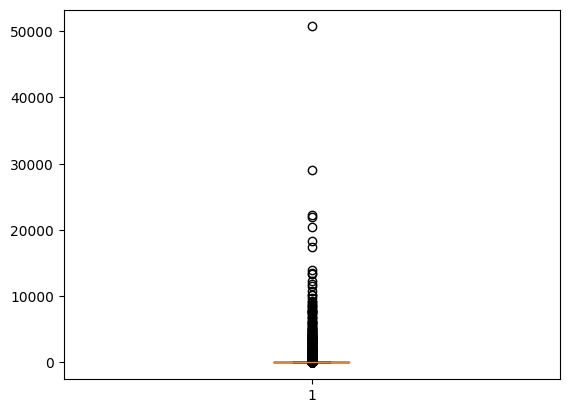

In [13]:

plt.boxplot(data.RevolvingUtilizationOfUnsecuredLines)
plt.show()

In [14]:
## рассчитываем выбросы
q1 = np.percentile(data.RevolvingUtilizationOfUnsecuredLines, 25)
q3 = np.percentile(data.RevolvingUtilizationOfUnsecuredLines, 75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

print("Верхний ус: ", upper_whisker)
print("Нижний ус: ", lower_whisker)

Верхний ус:  1.35281445575
Нижний ус:  -0.7639007662499999


In [15]:
data = data[data['RevolvingUtilizationOfUnsecuredLines'] <= 1.35]

In [16]:
data = data[data['RevolvingUtilizationOfUnsecuredLines'] >= -0.76]

№2 NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate

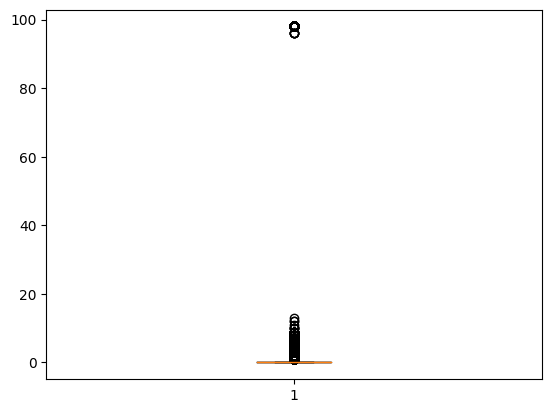

In [17]:
plt.boxplot(data["NumberOfTime30-59DaysPastDueNotWorse"])
plt.show()

In [18]:
## Количество задержек за 2 года не должно быть больше 24
data = data[data["NumberOfTime30-59DaysPastDueNotWorse"] <= 24]

In [19]:
data = data[data["NumberOfTimes90DaysLate"] <= 24]
data = data[data["NumberOfTime60-89DaysPastDueNotWorse"] <= 24]

№3 DebtRatio

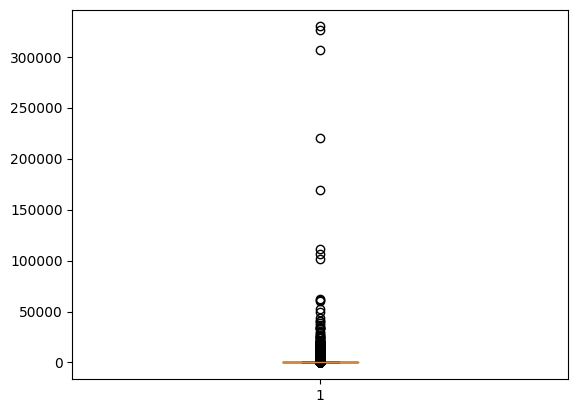

In [20]:
plt.boxplot(data.DebtRatio)
plt.show()

In [21]:
q1 = np.percentile(data.DebtRatio, 25)
q3 = np.percentile(data.DebtRatio, 75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

print("Верхний ус: ", upper_whisker)
print("Нижний ус: ", lower_whisker)

Верхний ус:  1.907045711375
Нижний ус:  -0.8624833316249999


In [22]:
data = data[data['DebtRatio'] <= 1.9]
data = data[data['DebtRatio'] >= -0.86]

## Разведочный анализ (EDA)

#### Посмотрим на общее распределение обьектов

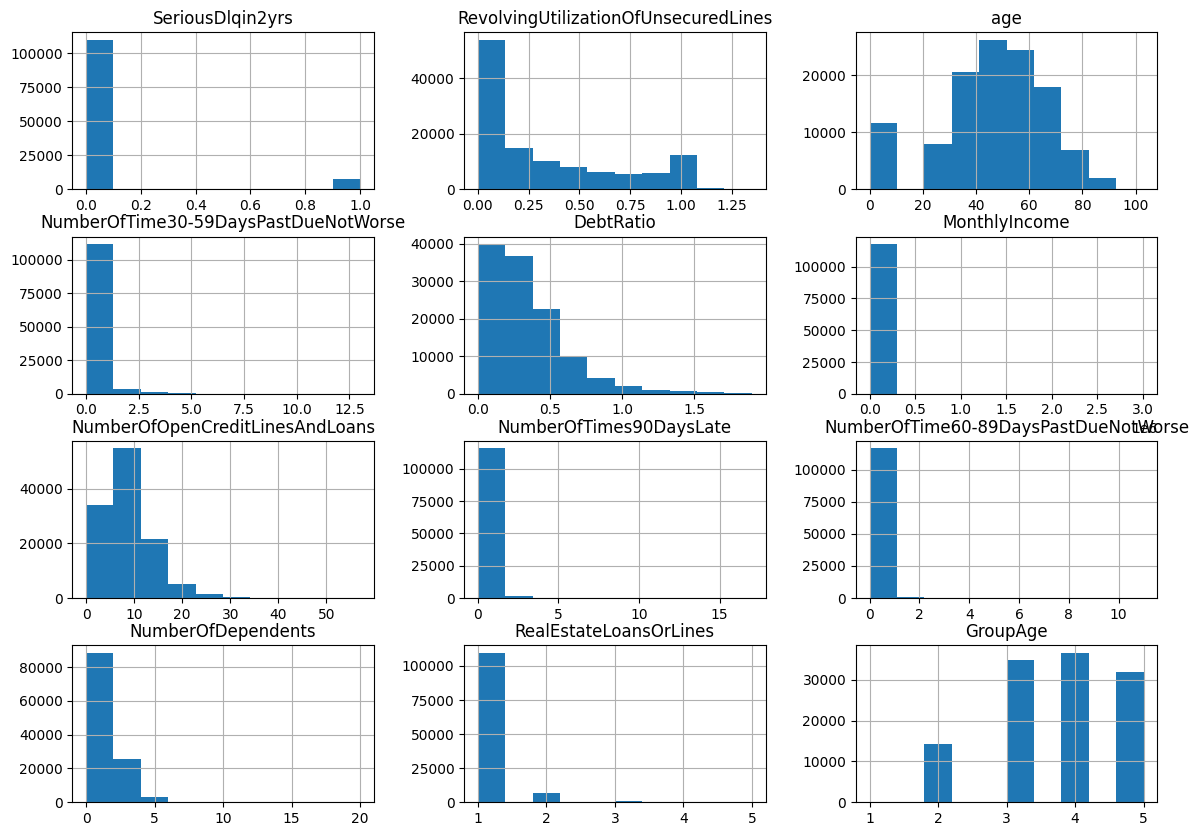

In [23]:
data.hist(figsize=(14, 10))
None

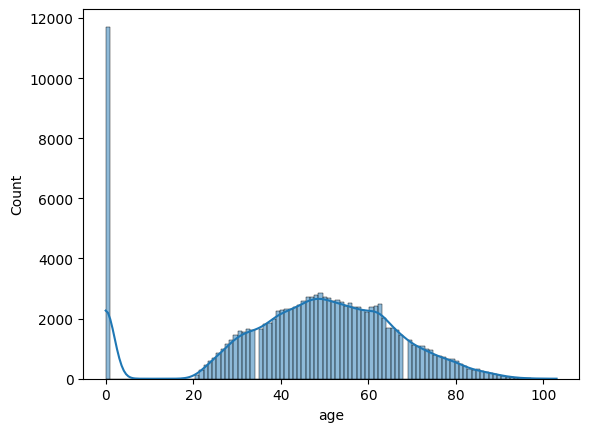

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data.age, kde=True)
plt.show()

#### *Рассмотрим детальнее взаимосвзяь категорий, количество значений которых нормально уместиться на графике*

## Рассмотрим связь с закодированным количеством кредитов

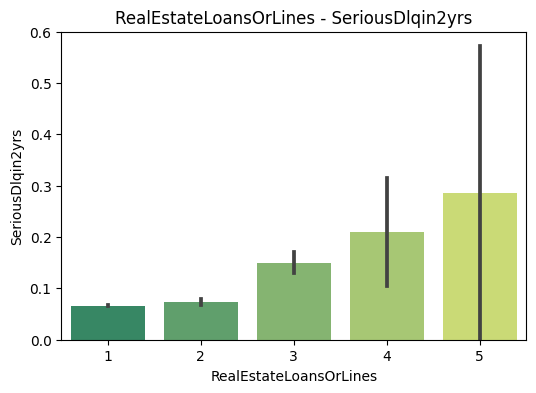

In [25]:
plt.figure(figsize=(6,4))

sns.barplot(x='RealEstateLoansOrLines', y='SeriousDlqin2yrs', data = data, palette='summer')
plt.title('RealEstateLoansOrLines - SeriousDlqin2yrs')
plt.show()

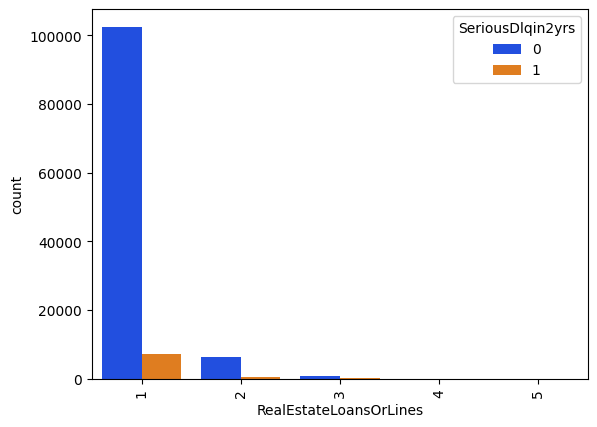

In [26]:
p = sns.countplot(x='RealEstateLoansOrLines', data = data, hue='SeriousDlqin2yrs', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

`Однозначно отобрать категорию нельзя`

## Рассмотрим связь с возрастными группами

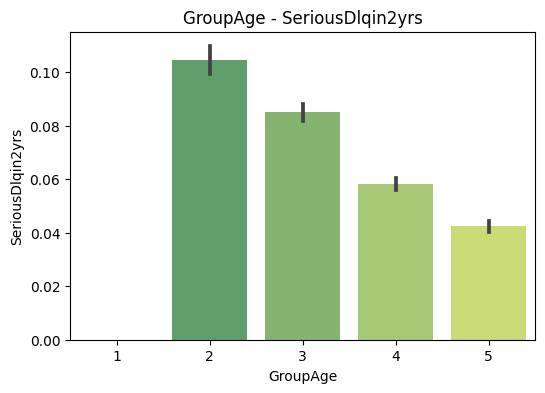

In [27]:
plt.figure(figsize=(6,4))

sns.barplot(x='GroupAge', y='SeriousDlqin2yrs', data = data, palette='summer')
plt.title('GroupAge - SeriousDlqin2yrs')
plt.show()

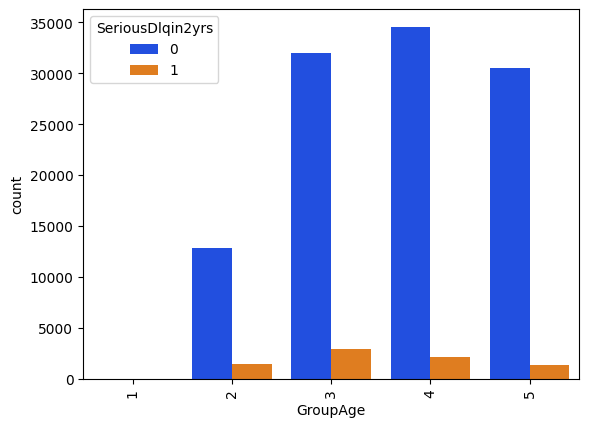

In [28]:
p = sns.countplot(x='GroupAge', data = data, hue='SeriousDlqin2yrs', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

`Однозначно отобрать категорию нельзя`

## Рассмотрим связь с количеством иждивенцев на попечении

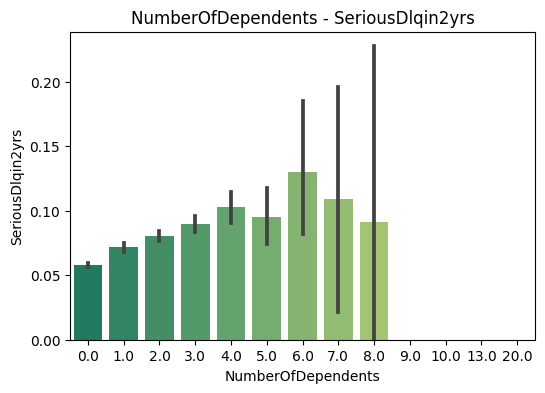

In [29]:
plt.figure(figsize=(6,4))

sns.barplot(x='NumberOfDependents', y='SeriousDlqin2yrs', data = data, palette='summer')
plt.title('NumberOfDependents - SeriousDlqin2yrs')
plt.show()

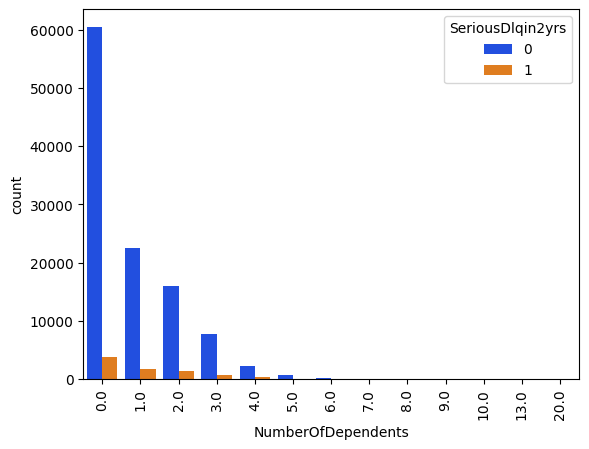

In [30]:
p = sns.countplot(x='NumberOfDependents', data = data, hue='SeriousDlqin2yrs', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

`Однозначно отобрать категорию нельзя`

## Рассмотрим общую корреляцию

##( линейная зависимость и диаграммы распределения рассеивания)

In [31]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-31-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
SeriousDlqin2yrs,1.00,0.27,-0.07,0.27,0.08,-0.02,-0.02,0.31,0.26,0.05,0.03,-0.08
RevolvingUtilizationOfUnsecuredLines,0.27,1.00,-0.17,0.24,0.14,-0.04,-0.17,0.23,0.19,0.08,-0.02,-0.22
age,-0.07,-0.17,1.00,-0.04,-0.05,0.02,0.11,-0.05,-0.04,-0.13,0.01,0.25
NumberOfTime30-59DaysPastDueNotWorse,0.27,0.24,-0.04,1.00,0.10,-0.00,0.07,0.22,0.30,0.06,0.03,-0.05
DebtRatio,0.08,0.14,-0.05,0.10,1.00,-0.06,0.32,-0.00,0.05,0.07,0.25,-0.04
MonthlyIncome,-0.02,-0.04,0.02,-0.00,-0.06,1.00,0.09,-0.02,-0.01,0.06,0.09,0.03
NumberOfOpenCreditLinesAndLoans,-0.02,-0.17,0.11,0.07,0.32,0.09,1.00,-0.09,-0.02,0.05,0.26,0.16
NumberOfTimes90DaysLate,0.31,0.23,-0.05,0.22,-0.00,-0.02,-0.09,1.00,0.29,0.03,-0.02,-0.06
NumberOfTime60-89DaysPastDueNotWorse,0.26,0.19,-0.04,0.30,0.05,-0.01,-0.02,0.29,1.00,0.04,-0.00,-0.05
NumberOfDependents,0.05,0.08,-0.13,0.06,0.07,0.06,0.05,0.03,0.04,1.00,0.05,-0.16


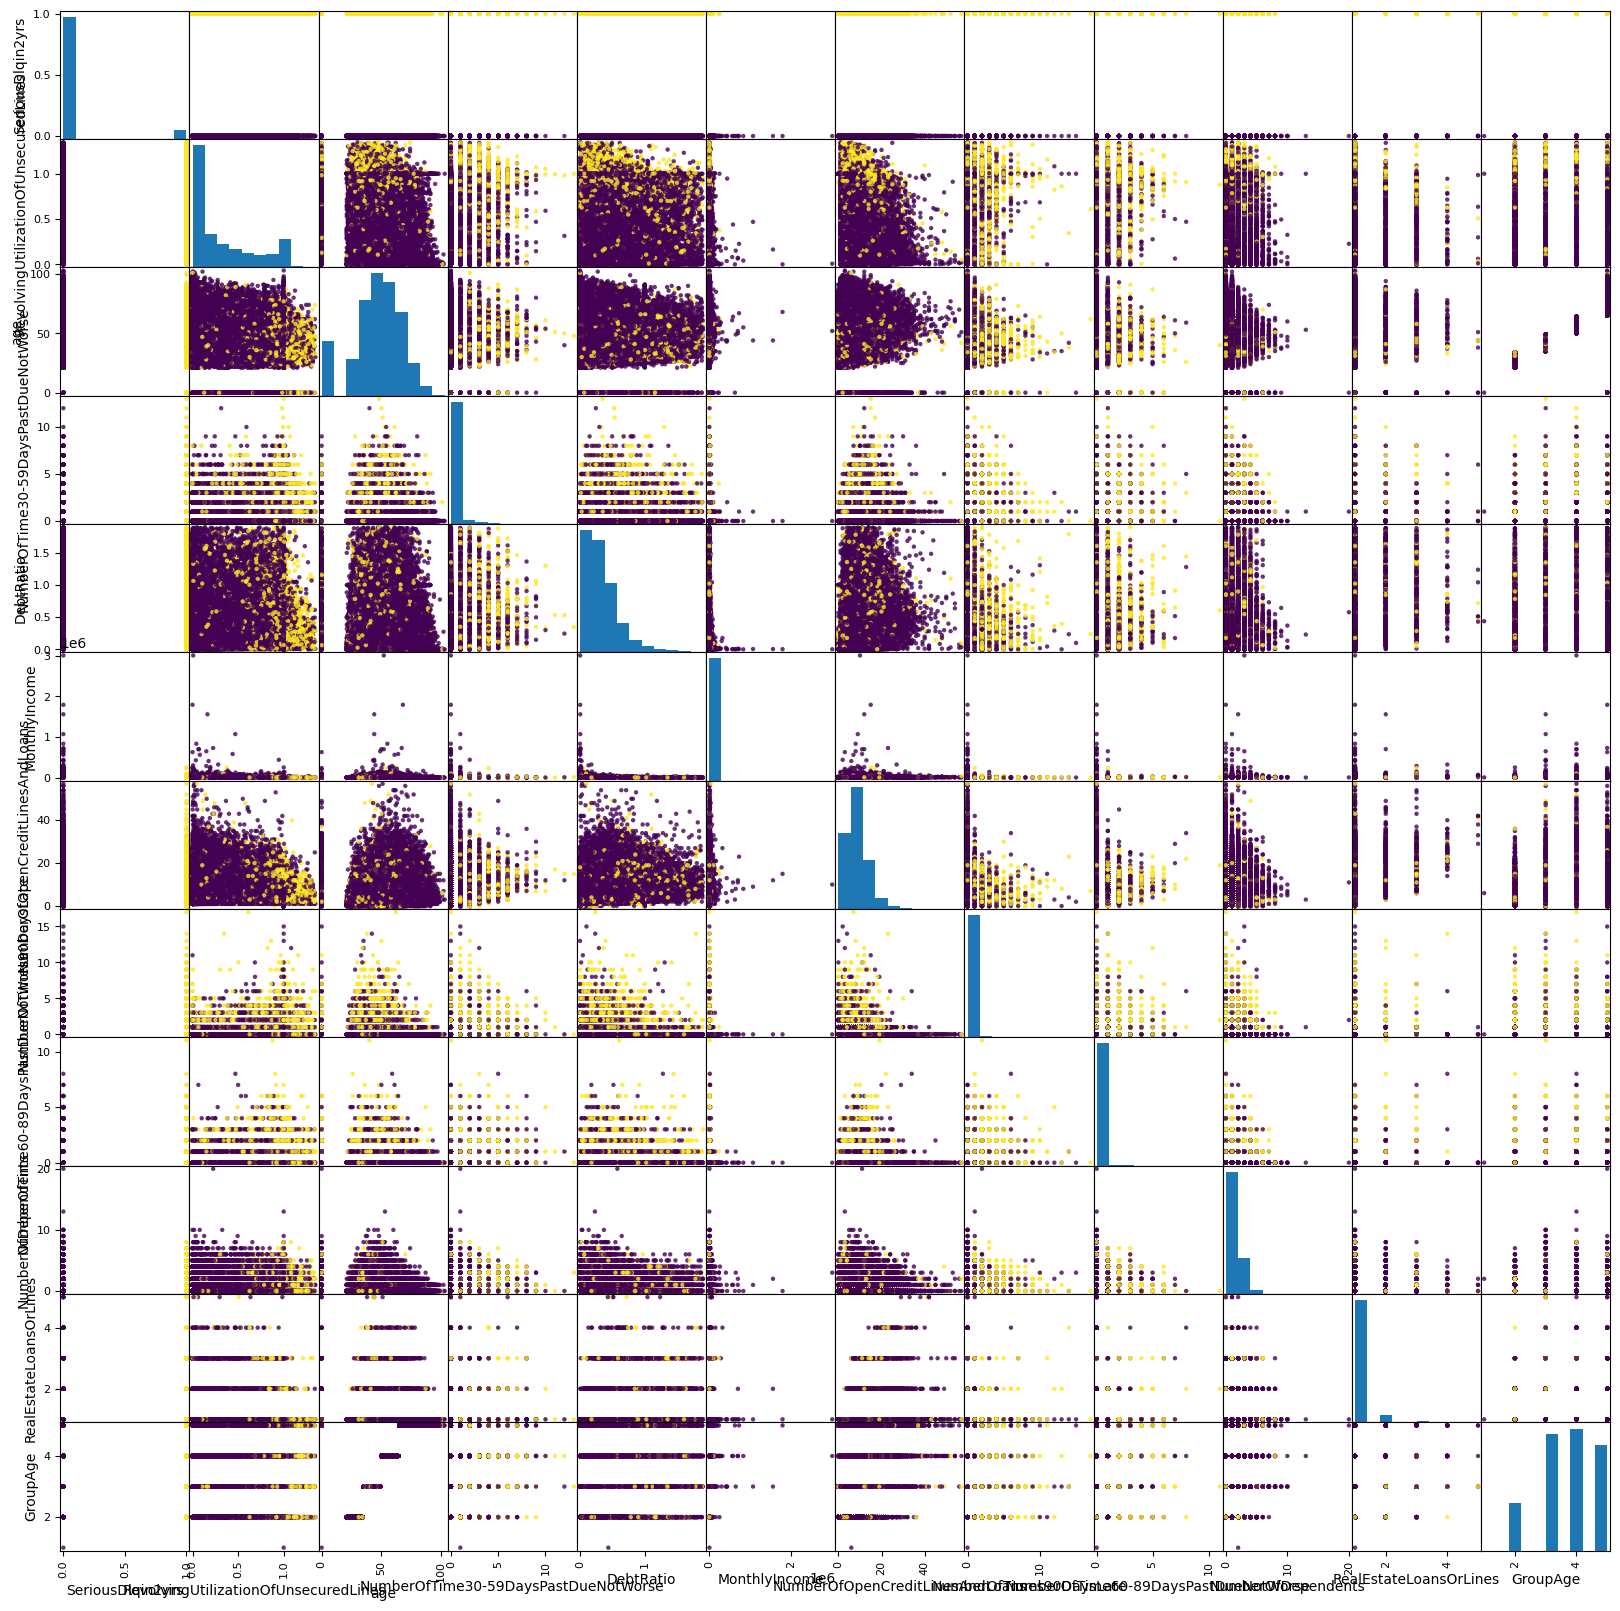

In [64]:
pd.plotting.scatter_matrix(data, c=data.SeriousDlqin2yrs, figsize=(20,20), marker='o',
                        hist_kwds={'bins': 10}, s=10, alpha=.8)
None

## Train test split

In [32]:
from sklearn.model_selection import train_test_split
y = data["SeriousDlqin2yrs"]
data = data.drop(['SeriousDlqin2yrs'],axis=1)

## Статистический тест

In [33]:
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

pca = StandardScaler()
data = pca.fit_transform(data)
model = Logit(y, data)
result = model.fit()

print(result.summary(alpha=0.05))

Optimization terminated successfully.
         Current function value: 0.664262
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               117871
Model:                          Logit   Df Residuals:                   117860
Method:                           MLE   Df Model:                           10
Date:                Sat, 01 Jul 2023   Pseudo R-squ.:                  -1.688
Time:                        08:46:00   Log-Likelihood:                -78297.
converged:                       True   LL-Null:                       -29133.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1340      0.007     20.062      0.000       0.121       0.147
x2            -0.0129      0.

На уровне значимости 0.01 оказались незначимы:
- age
- Monthly Income
- Number of open credit lines and loans
- Number of dependents